In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('../')
df=pd.read_csv(r'./normet/datasets/testing_data.csv',parse_dates=['date'])

In [2]:
import normet.autodew as ad
import normet.cpd as cpd

In [3]:
all_features=['date_unix','day_julian', 'weekday', 'hour','ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh']

In [4]:
df_dew=ad.do_all(df, value='PM2.5',
                     feature_names=all_features,
              split_method = 'random',time_budget=60,
                     variables_sample=['ws', 'wd','air_temp', 'atmos_pres', 'dew_point', 'RH','blh'], 
                     n_samples=300,fraction=0.75)

[flaml.automl.automl: 03-30 19:25:12] {2726} INFO - task = regression
[flaml.automl.automl: 03-30 19:25:12] {2728} INFO - Data split method: uniform
[flaml.automl.automl: 03-30 19:25:12] {2731} INFO - Evaluation method: holdout
[flaml.automl.automl: 03-30 19:25:12] {2858} INFO - Minimizing error metric: 1-r2
[flaml.automl.automl: 03-30 19:25:12] {3004} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl.automl: 03-30 19:25:12] {3334} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 03-30 19:25:12] {3472} INFO - Estimated sufficient time budget=223s. Estimated necessary time budget=2s.
[flaml.automl.automl: 03-30 19:25:12] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8661,	best estimator lgbm's best error=0.8661
[flaml.automl.automl: 03-30 19:25:12] {3334} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 03-30 19:25:12] {3519} INFO -  at 0.1s,	estimator lgbm's best error=0.8661,	best estim

[flaml.automl.automl: 03-30 19:25:19] {3519} INFO -  at 7.1s,	estimator extra_tree's best error=0.6040,	best estimator lgbm's best error=0.2401
[flaml.automl.automl: 03-30 19:25:19] {3334} INFO - iteration 34, current learner lgbm
[flaml.automl.automl: 03-30 19:25:23] {3519} INFO -  at 10.7s,	estimator lgbm's best error=0.2401,	best estimator lgbm's best error=0.2401
[flaml.automl.automl: 03-30 19:25:23] {3334} INFO - iteration 35, current learner rf
[flaml.automl.automl: 03-30 19:25:23] {3519} INFO -  at 10.9s,	estimator rf's best error=0.6495,	best estimator lgbm's best error=0.2401
[flaml.automl.automl: 03-30 19:25:23] {3334} INFO - iteration 36, current learner xgb_limitdepth
[flaml.automl.automl: 03-30 19:25:23] {3519} INFO -  at 10.9s,	estimator xgb_limitdepth's best error=0.3815,	best estimator lgbm's best error=0.2401
[flaml.automl.automl: 03-30 19:25:23] {3334} INFO - iteration 37, current learner xgb_limitdepth
[flaml.automl.automl: 03-30 19:25:23] {3519} INFO -  at 11.0s,	es

[flaml.automl.automl: 03-30 19:25:44] {3334} INFO - iteration 69, current learner lgbm
[flaml.automl.automl: 03-30 19:25:49] {3519} INFO -  at 37.1s,	estimator lgbm's best error=0.2286,	best estimator xgboost's best error=0.2267
[flaml.automl.automl: 03-30 19:25:49] {3334} INFO - iteration 70, current learner xgboost
[flaml.automl.automl: 03-30 19:25:52] {3519} INFO -  at 39.7s,	estimator xgboost's best error=0.2222,	best estimator xgboost's best error=0.2222
[flaml.automl.automl: 03-30 19:25:52] {3334} INFO - iteration 71, current learner xgboost
[flaml.automl.automl: 03-30 19:26:00] {3519} INFO -  at 48.5s,	estimator xgboost's best error=0.2222,	best estimator xgboost's best error=0.2222
[flaml.automl.automl: 03-30 19:26:00] {3334} INFO - iteration 72, current learner xgboost
[flaml.automl.automl: 03-30 19:26:01] {3519} INFO -  at 49.1s,	estimator xgboost's best error=0.2222,	best estimator xgboost's best error=0.2222
[flaml.automl.automl: 03-30 19:26:01] {3334} INFO - iteration 73, 

In [5]:
df_dew1=df_dew.loc['2019-11-01':'2020-05-01'].resample('1D').mean()

In [6]:
pt=cpd.rpt_breakpoints(df_dew1,window=7, n=5)

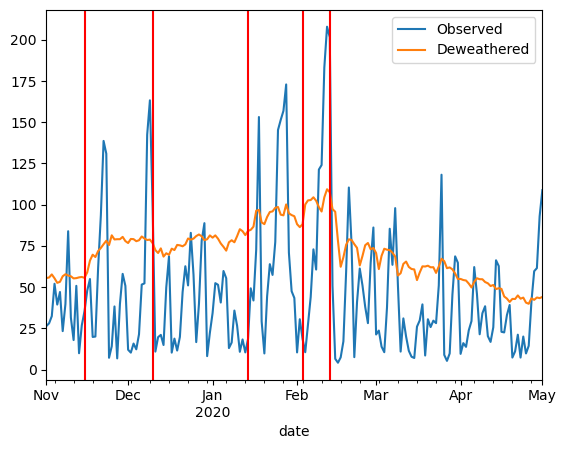

In [7]:
fig,ax=plt.subplots()
df_dew1.plot(ax=ax)
for i in np.arange(len(pt)):
    ax.axvline(pt[i],c='r',label='ruptures')

#ax.legend()